In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
import glasbey

palette = {
    "green": "#558150",
    "beige": "#F1E2C3",
    "brown": "#A7785A",
    "pink": "#F0D6C2",
    "black": "#0E0E0E",
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.framealpha'] = 0.2
rcParams['axes.edgecolor'] = palette["black"]
rcParams['axes.labelcolor'] = palette["black"]
rcParams['xtick.color'] = palette["black"]
rcParams['ytick.color'] = palette["black"]
rcParams['text.color'] = palette["black"]
rcParams['axes.titlecolor'] = palette["black"]

s_palette = sns.cubehelix_palette(as_cmap=True)
g_palette = glasbey.create_palette()
cpal = sns.cubehelix_palette(start=-0.25, rot=2, as_cmap=True)
blue_palette = sns.cubehelix_palette(as_cmap=True, rot=-.25, light=.7)
blue_root_palette = sns.cubehelix_palette(5, rot=-.25, light=.7)

In [4]:
import nd2

timecourse_path = Path(r"D:\Tracking\Chetan\Timecourse.nd2")
main_path = Path(r"D:\Tracking\Chetan")

with nd2.ND2File(timecourse_path) as images:
    # print(images.metadata)
    print(images.sizes)
    # print(images.experiment[0])
    print([point.name for point in images.experiment[1].parameters.points])

{'T': 6, 'P': 50, 'C': 4, 'Y': 2720, 'X': 2720}
['F8-1', 'F8-2', 'F8-3', 'F8-4', 'F8-5', 'F7-1', 'F7-2', 'F7-3', 'F7-4', 'F7-5', 'F1-1', 'F1-2', 'F1-3', 'F1-4', 'F1-5', 'F2-1', 'F2-2', 'F2-3', 'F2-4', 'F2-5', 'F3-1', 'F3-2', 'F3-3', 'F3-4', 'F3-5', 'F4-1', 'F4-2', 'F4-3', 'F4-4', 'F4-5', 'F5-1', 'F5-2', 'F5-3', 'F5-4', 'F5-5', 'F6-1', 'F6-2', 'F6-3', 'F6-4', 'F6-5', 'VKI-1', 'VKI-2', 'VKI-3', 'VKI-4', 'VKI-5', '4-5-1', '4-5-2', '4-5-3', '4-5-4', '4-5-5']


In [6]:
with nd2.ND2File(timecourse_path) as images:
    arr = images.to_dask()
    for i, point in tqdm(enumerate(images.experiment[1].parameters.points)):
        outfile = main_path / "446_locs" / f"point_{i:02d}_{point.name}_446_timecourse.tif"
        # print(arr[:, i].shape)
        tifffile.imwrite(outfile, arr[:, i], imagej=True, metadata={"axes": "TCYX"})

C:\Users\Harrison\.conda\envs\linajea\Lib\site-packages\dask\base.py:1250: UserWarning: ND2File file not closed before garbage collection. Please use `with ND2File(...):` context or call `.close()`.
  mod.loads(out, buffers=buffers)
0it [00:00, ?it/s]

(6, 4, 2720, 2720)


1it [00:01,  1.00s/it]

(6, 4, 2720, 2720)


2it [00:01,  1.11it/s]

(6, 4, 2720, 2720)


3it [00:02,  1.23it/s]

(6, 4, 2720, 2720)


4it [00:03,  1.32it/s]

(6, 4, 2720, 2720)


5it [00:03,  1.35it/s]

(6, 4, 2720, 2720)


6it [00:04,  1.39it/s]

(6, 4, 2720, 2720)


7it [00:05,  1.42it/s]

(6, 4, 2720, 2720)


8it [00:05,  1.42it/s]

(6, 4, 2720, 2720)


9it [00:06,  1.43it/s]

(6, 4, 2720, 2720)


10it [00:07,  1.44it/s]

(6, 4, 2720, 2720)


11it [00:08,  1.44it/s]

(6, 4, 2720, 2720)


12it [00:08,  1.34it/s]

(6, 4, 2720, 2720)


13it [00:09,  1.37it/s]

(6, 4, 2720, 2720)


14it [00:10,  1.35it/s]

(6, 4, 2720, 2720)


15it [00:11,  1.35it/s]

(6, 4, 2720, 2720)


16it [00:11,  1.35it/s]

(6, 4, 2720, 2720)


17it [00:12,  1.30it/s]

(6, 4, 2720, 2720)


18it [00:13,  1.30it/s]

(6, 4, 2720, 2720)


19it [00:14,  1.32it/s]

(6, 4, 2720, 2720)


20it [00:14,  1.33it/s]

(6, 4, 2720, 2720)


21it [00:15,  1.22it/s]

(6, 4, 2720, 2720)


22it [00:16,  1.20it/s]

(6, 4, 2720, 2720)


23it [00:17,  1.17it/s]

(6, 4, 2720, 2720)


24it [00:18,  1.15it/s]

(6, 4, 2720, 2720)


25it [00:19,  1.16it/s]

(6, 4, 2720, 2720)


26it [00:20,  1.17it/s]

(6, 4, 2720, 2720)


27it [00:21,  1.15it/s]

(6, 4, 2720, 2720)


28it [00:22,  1.15it/s]

(6, 4, 2720, 2720)


29it [00:23,  1.01it/s]

(6, 4, 2720, 2720)


30it [00:24,  1.07s/it]

(6, 4, 2720, 2720)


31it [00:25,  1.07s/it]

(6, 4, 2720, 2720)


32it [00:26,  1.11s/it]

(6, 4, 2720, 2720)


33it [00:28,  1.18s/it]

(6, 4, 2720, 2720)


34it [00:29,  1.20s/it]

(6, 4, 2720, 2720)


35it [00:30,  1.22s/it]

(6, 4, 2720, 2720)


36it [00:31,  1.21s/it]

(6, 4, 2720, 2720)


37it [00:33,  1.22s/it]

(6, 4, 2720, 2720)


38it [00:34,  1.25s/it]

(6, 4, 2720, 2720)


39it [00:35,  1.24s/it]

(6, 4, 2720, 2720)


40it [00:36,  1.25s/it]

(6, 4, 2720, 2720)


41it [00:38,  1.25s/it]

(6, 4, 2720, 2720)


42it [00:39,  1.24s/it]

(6, 4, 2720, 2720)


43it [00:40,  1.24s/it]

(6, 4, 2720, 2720)


44it [00:41,  1.23s/it]

(6, 4, 2720, 2720)


45it [00:43,  1.24s/it]

(6, 4, 2720, 2720)


46it [00:44,  1.24s/it]

(6, 4, 2720, 2720)


47it [00:45,  1.23s/it]

(6, 4, 2720, 2720)


48it [00:46,  1.22s/it]

(6, 4, 2720, 2720)


49it [00:48,  1.23s/it]

(6, 4, 2720, 2720)


50it [00:49,  1.02it/s]


In [11]:
from xml.etree import ElementTree

xml_path = Path(r"D:\Tracking\Chetan\multipoints.xml")
xml = ElementTree.parse(xml_path)
root = xml.getroot()
print(root[0][1].tag)

IndexError: child index out of range

In [37]:
from collections import defaultdict
counter = 0
for child in root[0]:
    if child.attrib["runtype"] == "NDSetupMultipointListItem":
        for c in child:
            if c.tag == "strName":
                
                if c.attrib["value"] != "":
                    print(c.attrib["value"])
                    counter += 1
                    
print(counter)
print("_________________________")
data = defaultdict(list)
counter = 0
for child in root[0]:
    if child.attrib["runtype"] == "NDSetupMultipointListItem":
        for c in child:
            data[c.tag].append(c.attrib["value"])
            
        data["well"].append(child[1].attrib["value"][:2])
            
df = pd.DataFrame(data)


4-5-1
4-5-2
4-5-3
4-5-4
4-5-5
F8-1
F8-2
F8-3
F8-4
F8-5
F7-1
F7-2
F7-3
F7-4
F7-5
F1-1
F1-2
F1-3
F1-4
F1-5
F2-1
F2-2
F2-3
F2-4
F2-5
F3-1
F3-2
F3-3
F3-4
F3-5
F4-1
F4-2
F4-3
F4-4
F4-5
F5-1
F5-2
F5-3
F5-4
F5-5
F6-1
F6-2
F6-3
F6-4
F6-5
45
_________________________


In [38]:
df["dXPosition"] = df["dXPosition"].astype(float)
df["dYPosition"] = df["dYPosition"].astype(float)
df

,bChecked,strName,dXPosition,dYPosition,dZPosition,dPFSOffset,baUserData,well
0,false,,-49041.0,33235.5,4049.540000000000418,17974.000000000000000,,
1,false,,-48297.5,33235.5,4044.660000000000309,17896.000000000000000,,
2,false,,-48297.5,30082.5,4042.080000000000382,17896.000000000000000,,
3,false,,-48614.1,27565.6,4041.580000000000382,17896.000000000000000,,
4,false,,-50331.0,27364.3,4048.420000000000528,17896.000000000000000,,
...,...,...,...,...,...,...,...,...
63,false,,-49230.9,13330.6,4245.159999999999854,17828.000000000000000,,
64,false,,-45224.4,9127.6,3669.240000000000236,17869.000000000000000,,
65,false,,-49710.6,11482.9,3672.980000000000018,17919.000000000000000,,
66,false,,-53171.1,14726.1,3701.340000000000146,-1.000000000000000,,


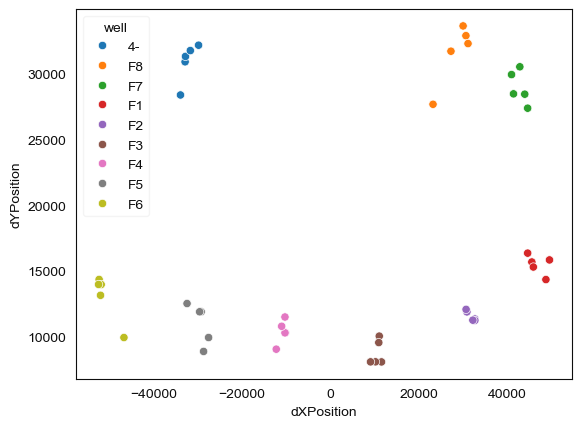

In [40]:
sns.scatterplot(df[df["bChecked"]=="true"], x="dXPosition", y="dYPosition", hue="well")
plt.show()